Convolutional Neural Network


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow. keras.datasets import mnist
from matplotlib import pyplot as plt
import numpy as np
import random

In [ ]:
# Defining model

inputs = keras.Input(shape = (28, 28, 1))
x = layers.Conv2D(filters = 32, kernel_size = 3, activation = "relu")(inputs)
x = layers.MaxPool2D(pool_size = 2)(x)
x = layers.Conv2D(filters = 64, kernel_size = 3, activation = "relu")(x)
x = layers.MaxPool2D(pool_size = 2)(x)
x = layers.Conv2D(filters = 128, kernel_size = 3, activation = "relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation = "softmax")(x)

model = keras.Model(inputs = inputs, outputs = outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

In [ ]:
(train_images, train_labels), (test_images , test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [ ]:
# Reshaping images

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255

In [ ]:
# Training the model on MNIST dataset

model.compile(optimizer = "rmsprop", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
model.fit(train_images, train_labels, epochs = 5, batch_size = 64)

Epoch 1/5
938/938 [==============================] - 70s 72ms/step - loss: 0.1580 - accuracy: 0.9509
Epoch 2/5
938/938 [==============================] - 67s 72ms/step - loss: 0.0459 - accuracy: 0.9862
Epoch 3/5
938/938 [==============================] - 53s 57ms/step - loss: 0.0314 - accuracy: 0.9904
Epoch 4/5
938/938 [==============================] - 54s 58ms/step - loss: 0.0245 - accuracy: 0.9925
Epoch 5/5
938/938 [==============================] - 54s 58ms/step - loss: 0.0180 - accuracy: 0.9941


In [ ]:
#Evaluating the model

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

313/313 [==============================] - 3s 9ms/step - loss: 0.0272 - accuracy: 0.9912
Test accuracy: 0.991
Test loss: 0.027


1/1 [==============================] - 0s 21ms/step


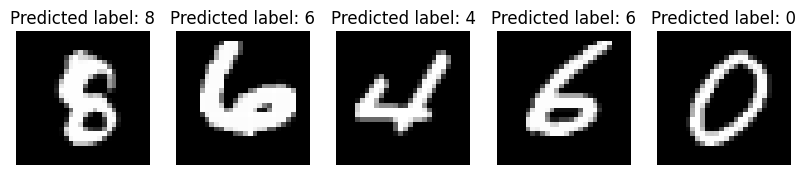

In [ ]:
def plot_image_with_prediction(image, prediction, subplot):
  subplot.imshow(image, cmap="gray")
  subplot.set_title(f"Predicted label: {np.argmax(prediction)}")
  subplot.axis("off")

# Get a random sample of test images
total_images = 5
random_indices = random.sample(range(len(test_images)), total_images)
random_images = test_images[random_indices]
predictions = model.predict(random_images)

# Create a figure and subplots
fig, axes = plt.subplots(nrows=1, ncols = total_images, figsize=(10, 5))

# Plot the random images with predictions on subplots
for i in range(total_images):
  image = random_images[i].reshape(28, 28)
  prediction = predictions[i]
  plot_image_with_prediction(image, prediction, axes[i])

plt.show()